<h1 style="color:black" align="center">K Means Clustering Algorithm</h1>

**Importing Important Library**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**Reading CSV File**

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**Visualizing the Cluster in Data**

Text(0, 0.5, 'Income ($)')

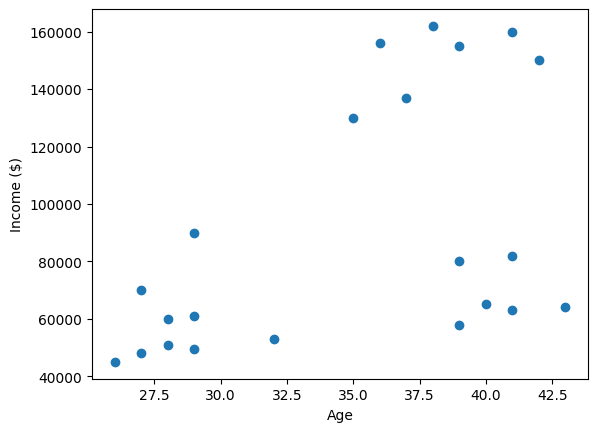

In [4]:
plt.scatter(df["Age"],df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income ($)")

**Importing K Means Algorithm**

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

**Fit and Predict the Data**

In [7]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

**Adding the Predicted Data as Column in our Orignal DataFrame**

In [8]:
df["Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


**Visualizing the Cluster in Data with Different Cluster Value**

Text(0, 0.5, 'Income($)')

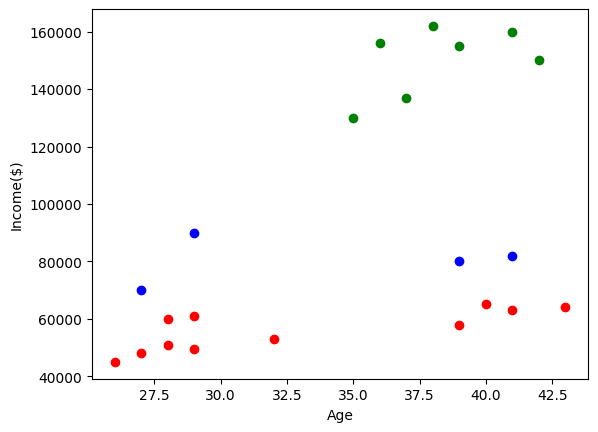

In [11]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")

plt.xlabel("Age")
plt.ylabel("Income($)")

**Importing MinMaxScaler Method**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

**Transforming Income Column to Scale of 0 to 1**

In [15]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


**Transforming Age Column to Scale of 0 to 1**

In [16]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


**Fit and Predict the Data**

In [17]:
km = KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

**Adding the Predicted Data as Another Column in our Orignal DataFrame**

In [19]:
df["New Cluster"] = y_predicted
df.head()

,Name,Age,Income($),Cluster,New Cluster
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


**Visualizing the Cluster in New Data with Different Cluster Value**

Text(0, 0.5, 'Income($)')

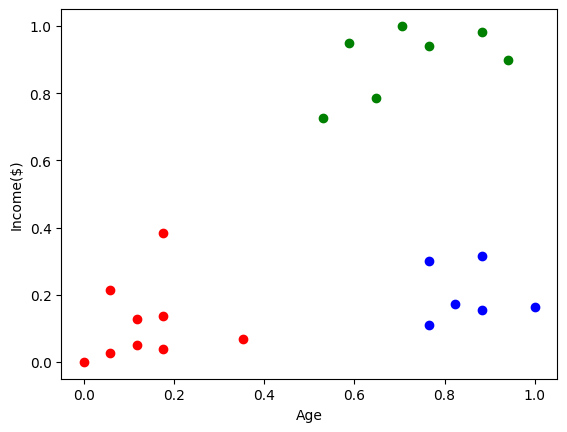

In [20]:
df1 = df[df["New Cluster"]==0]
df2 = df[df["New Cluster"]==1]
df3 = df[df["New Cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")

plt.xlabel("Age")
plt.ylabel("Income($)")

**Determinig the Cluster Center**

In [21]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

**Visualizing the Cluster in New Data with Different Cluster Value and Cluster Center**

Text(0, 0.5, 'Income($)')

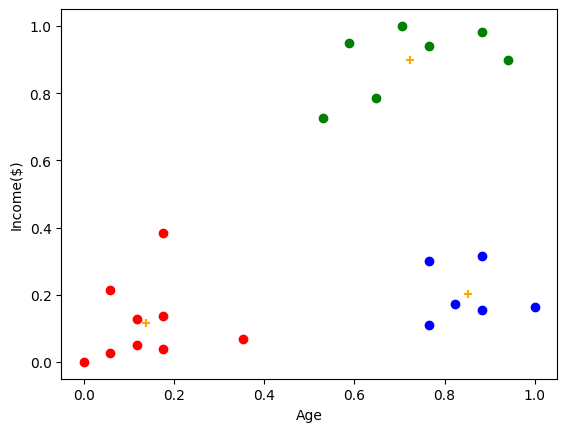

In [22]:
df1 = df[df["New Cluster"]==0]
df2 = df[df["New Cluster"]==1]
df3 = df[df["New Cluster"]==2]

plt.scatter(df1["Age"],df1["Income($)"],color="red")
plt.scatter(df2["Age"],df2["Income($)"],color="green")
plt.scatter(df3["Age"],df3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="orange",marker="+")

plt.xlabel("Age")
plt.ylabel("Income($)")

**Finding the Sum of Squared Error**

In [28]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)# km.inetria will give you the value of sum of square error

sse

C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\iamri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.17299621932455467,
 0.13937852495507838,
 0.10188787724979426]

**Visualizing the SSE with Elbow Plot**

Text(0, 0.5, 'Sum of Squared Error')

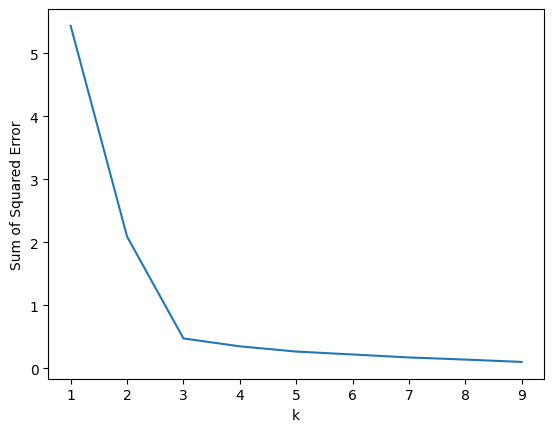

In [30]:
plt.plot(k_rng,sse)
plt.xlabel("k")
plt.ylabel("Sum of Squared Error")

**Here is our Elbow Plot with Elbow at K=3 which is our Orignal value of K**